In [78]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [79]:
data=pd.read_csv('WineQT.csv')

In [80]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [81]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [82]:
data.shape

(1143, 13)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [84]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [85]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [86]:
data.duplicated().sum()

0

In [87]:
data=data.drop('Id', axis=1)

In [88]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [90]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


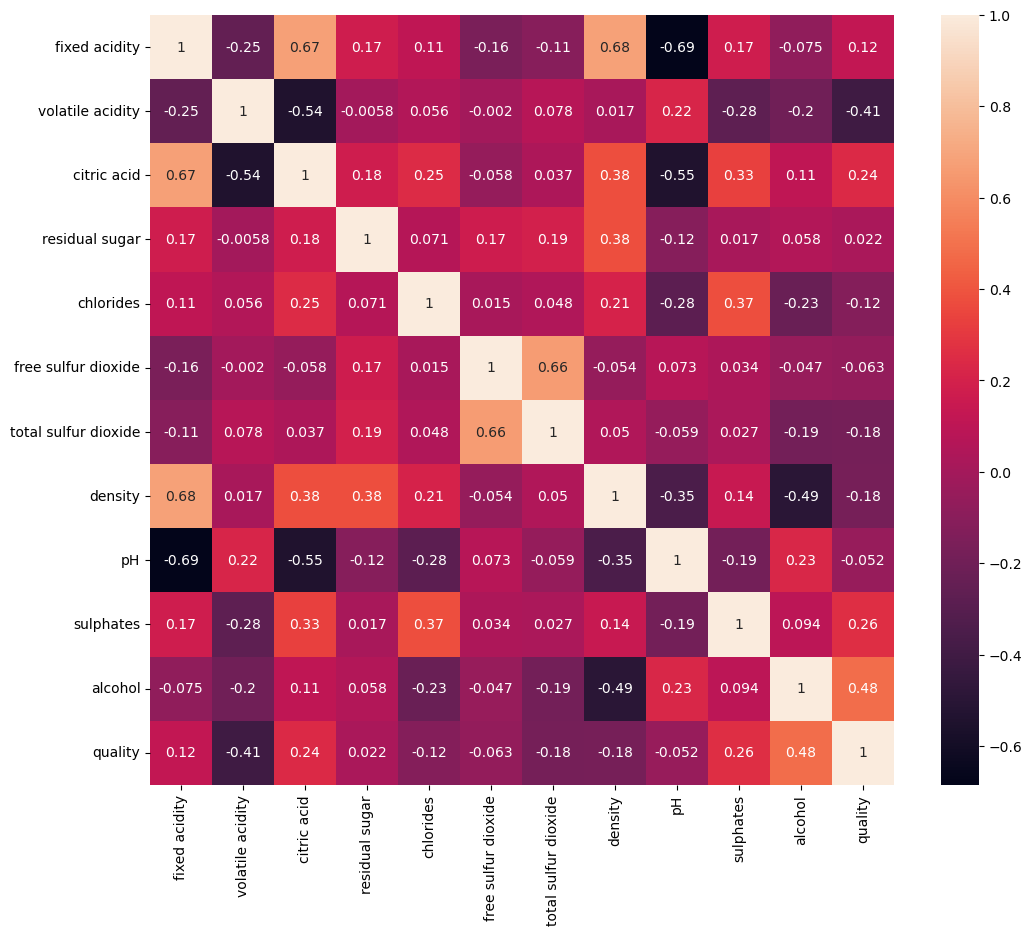

In [91]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True);

### quantitative distribution of the target variable

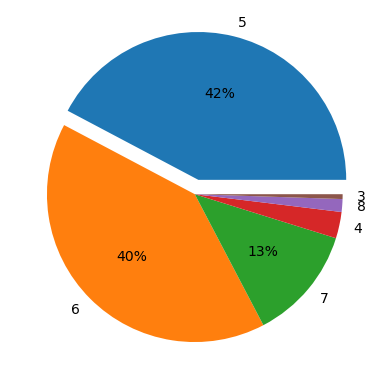

In [92]:
explode = [0.1, 0, 0, 0, 0, 0]
autopct=lambda pct: '{:.0f}%'.format(pct) if pct > 10 else ''
plt.pie(data['quality'].value_counts(), labels=data['quality'].unique(), explode=explode, autopct=autopct)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

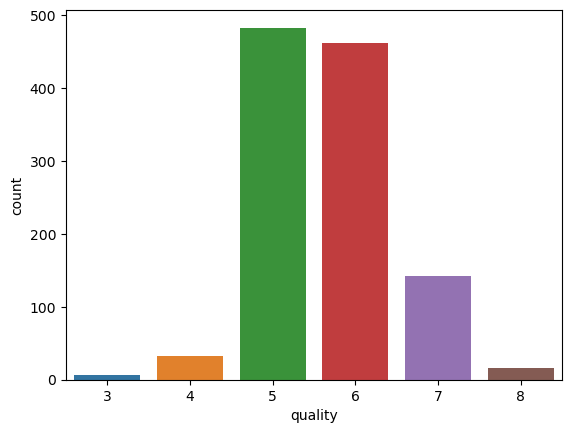

In [93]:
sns.countplot(x=data['quality'])

In [94]:
quality_val= pd.DataFrame(data['quality'].value_counts())
quality_val['%']= quality_val['quality']/data.shape[0]
quality_val

,quality,%
5,483,0.422572
6,462,0.404199
7,143,0.125109
4,33,0.028871
8,16,0.013998
3,6,0.005249


Number of unique categories is 6.
Wine records having quality of 3,4 and 8 account for less than 5% of dataset.
Most of wine samples have quality of 5 or 6 (over 80% of all records) indicating an imbalanced dataset.

In [95]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

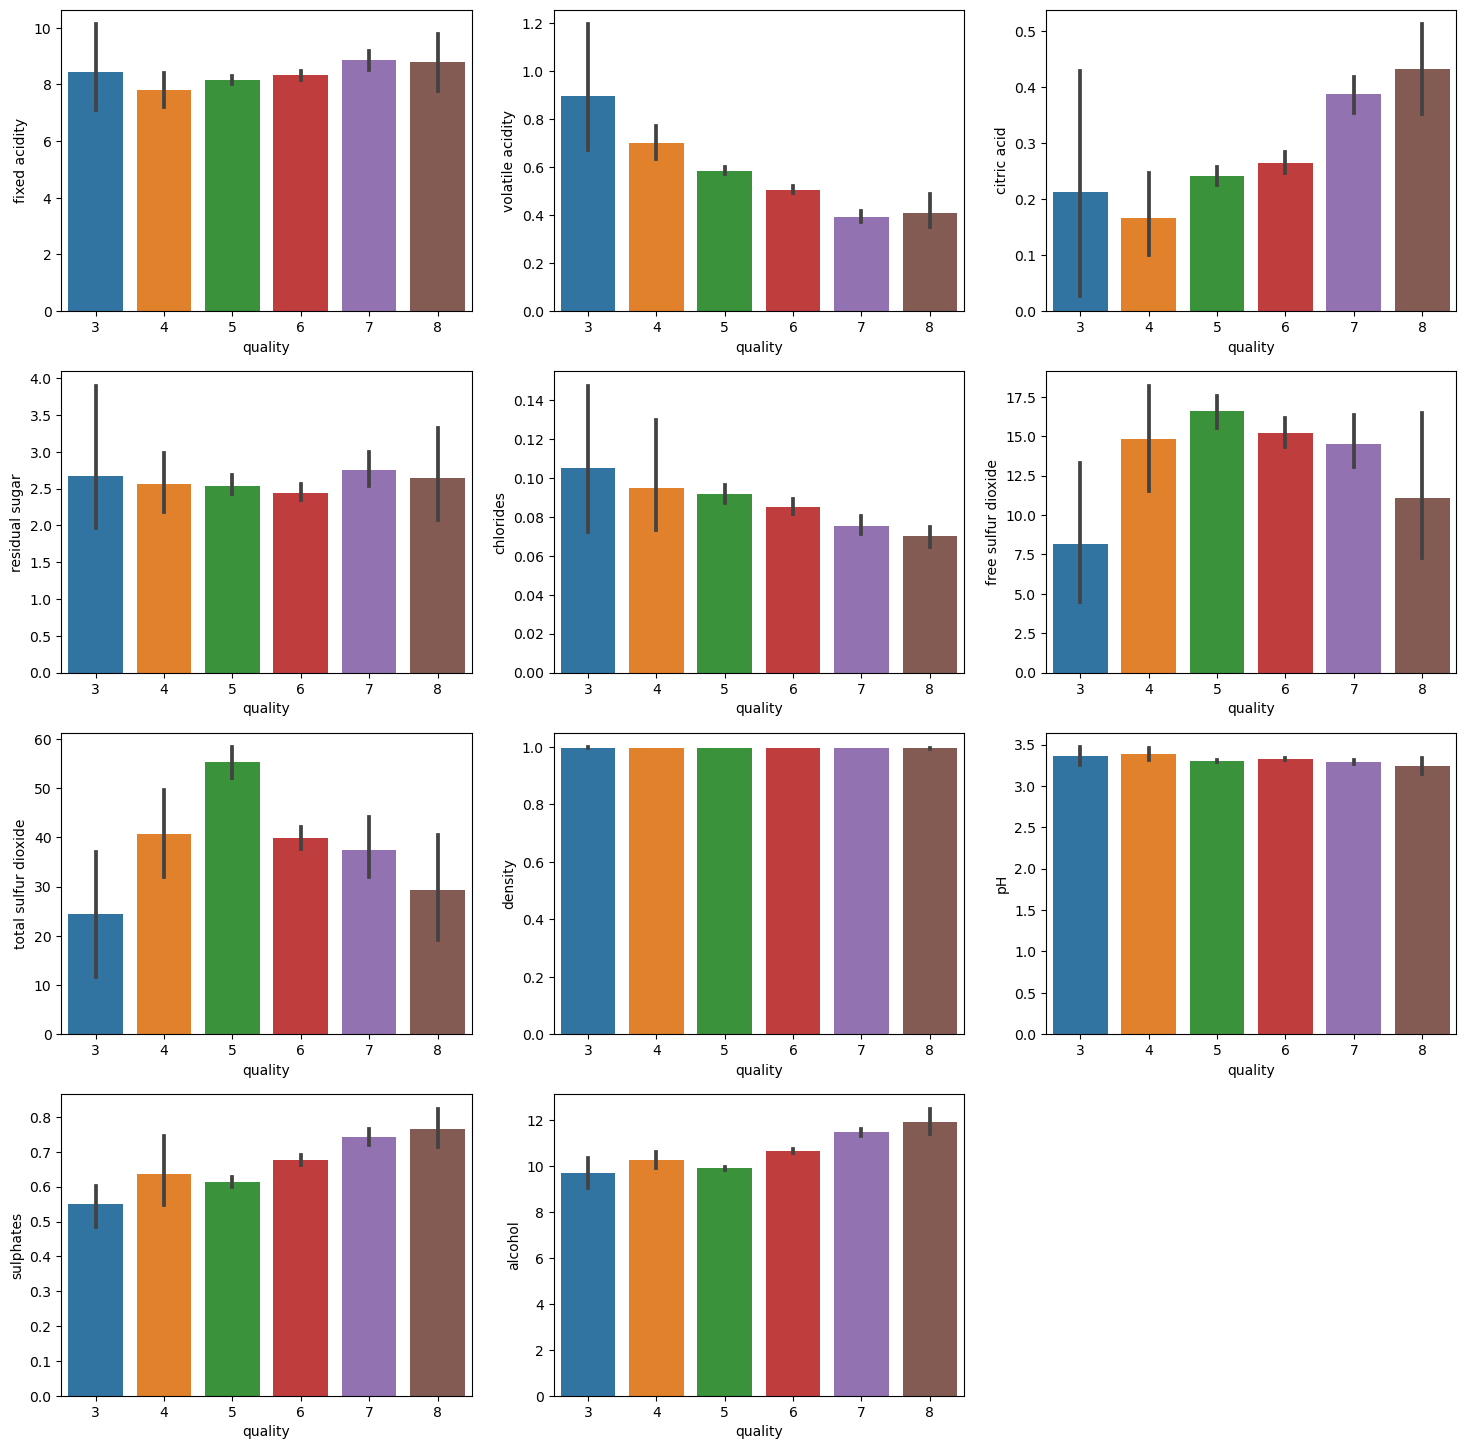

In [96]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(data.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=data, x=data.quality, y=col, ax=ax)

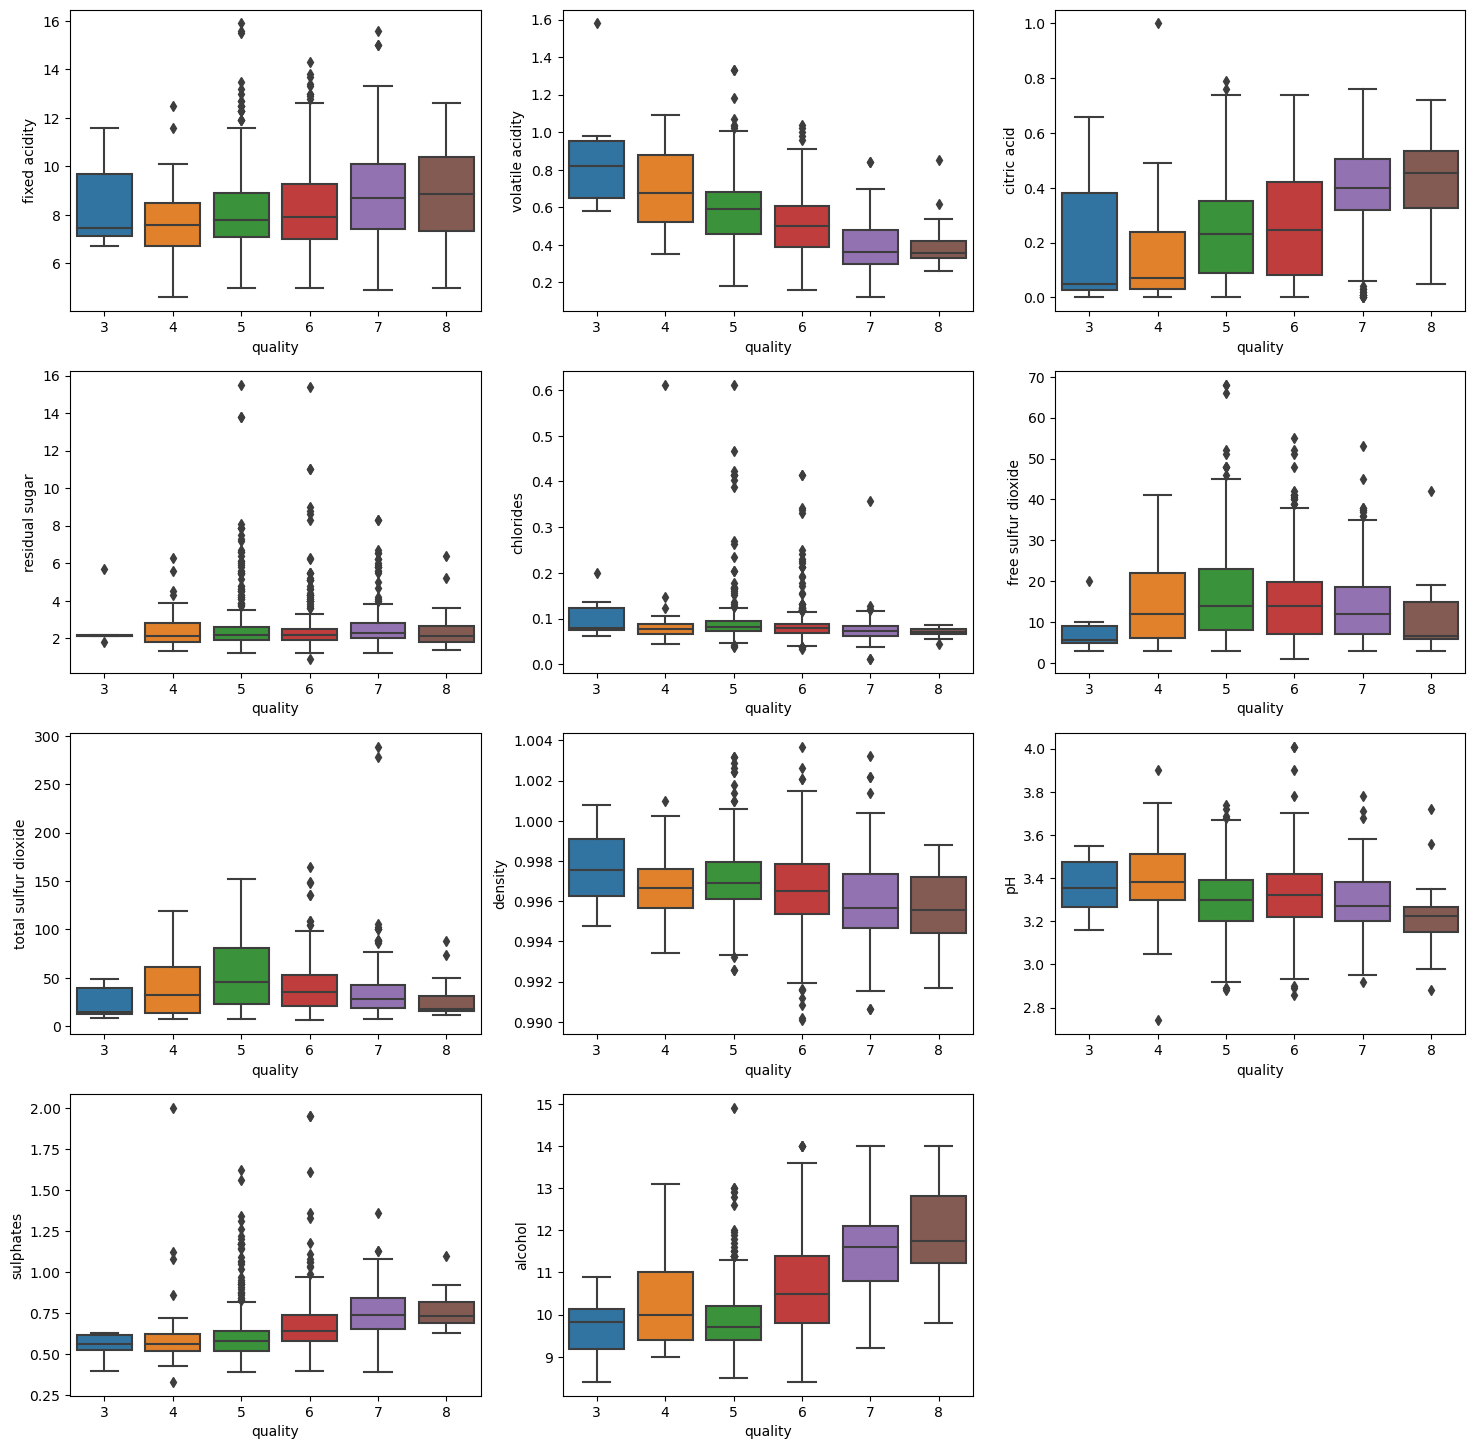

In [97]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(data.select_dtypes(include=['float64']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=data, x=data.quality, y=col, ax=ax)

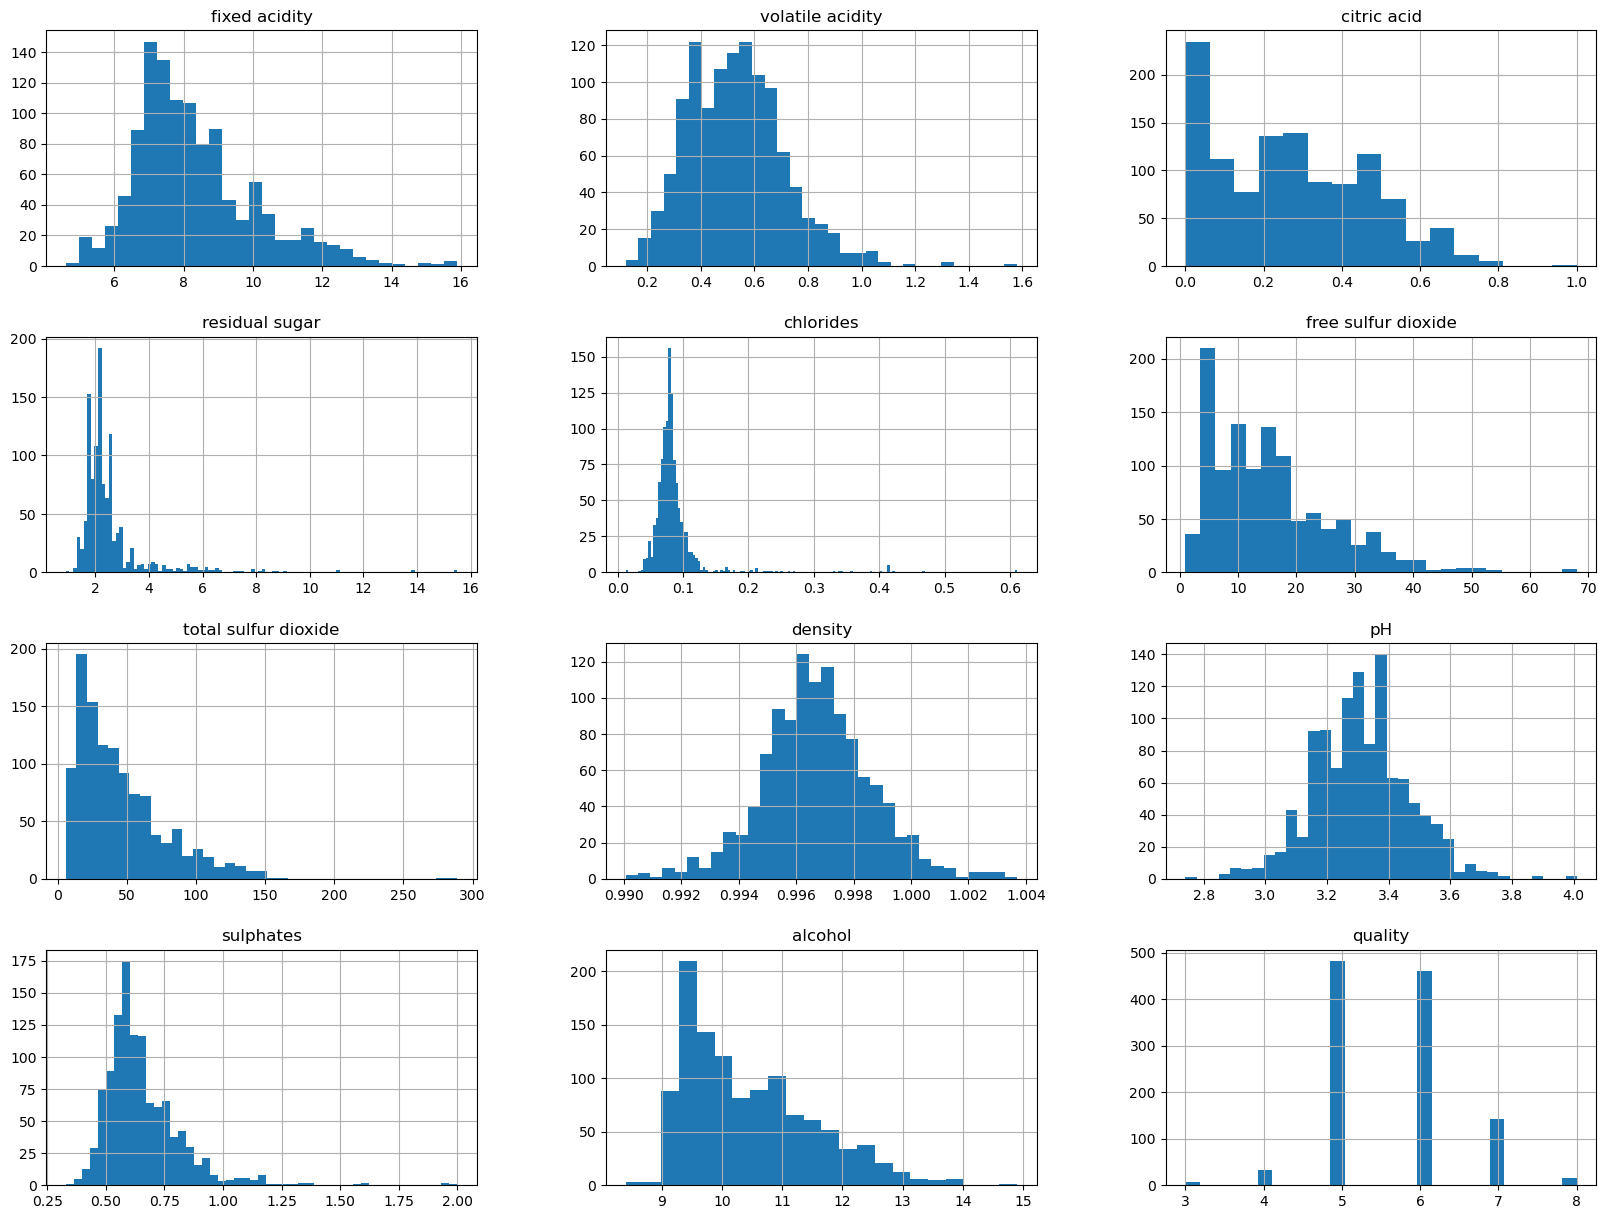

In [98]:
data.hist(figsize=(20,15),bins='auto')
plt.show()

### Check Skewness

In [99]:
data.skew().sort_values()

density                 0.102395
pH                      0.221138
quality                 0.286792
citric acid             0.371561
volatile acidity        0.681547
alcohol                 0.863313
fixed acidity           1.044930
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
sulphates               2.497266
residual sugar          4.361096
chlorides               6.026360
dtype: float64

### Fix Skewness

In [100]:
data['fixed acidity']=data['fixed acidity'].apply(np.log)
data['total sulfur dioxide']=data['total sulfur dioxide'].apply(np.log)
data['sulphates']=data['sulphates'].apply(np.log)
data['free sulfur dioxide']=data['free sulfur dioxide'].apply(np.log)
data['chlorides']=data['chlorides'].apply(np.log)
data['residual sugar']=data['residual sugar'].apply(np.log)

In [101]:
data.skew().sort_values()

free sulfur dioxide    -0.237440
total sulfur dioxide   -0.039429
density                 0.102395
pH                      0.221138
quality                 0.286792
citric acid             0.371561
fixed acidity           0.417080
volatile acidity        0.681547
alcohol                 0.863313
sulphates               0.978688
chlorides               1.632336
residual sugar          1.741037
dtype: float64

# Modelling

## Without Oversampling 

In [102]:
X=data.drop('quality', axis=1)
y=data['quality']

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify = y,random_state=42)

In [104]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
pred_prob = rf.predict_proba(X_test)

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(roc_auc_score(y_test, pred_prob, multi_class='ovo'))
print(classification_report(y_test,y_pred))

0.7117903930131004
0.6896786389891422
0.815538030567436
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.85      0.79        97
           6       0.68      0.73      0.71        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.68      0.71      0.69       229



## SMOTE Oversampling

In [109]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X,y=sm.fit_resample(X,y)

In [110]:
print('Original class distribution:')
print(y.value_counts())

Original class distribution:
5    483
6    483
7    483
4    483
8    483
3    483
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

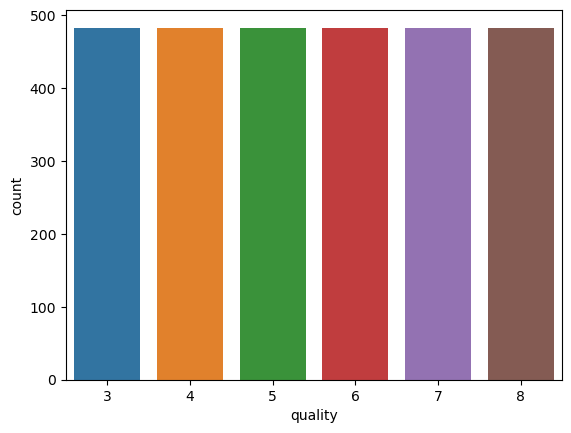

In [112]:
sns.countplot(x=y)

In [123]:
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

In [124]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('XGB', XGBClassifier()))

In [125]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    cv = KFold(n_splits=4, shuffle=True, random_state=42)  
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1, error_score='raise')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#def evaluate_model(model, X_train, y_train):
  #  cv = KFold(n_splits=4, shuffle=True, random_state=42)
  #  scores = cross_val_score(model, X_train, y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1, error_score='raise')
   # return scores

KNN: 0.938184 (0.002998)
DT: 0.861300 (0.009250)
NB: 0.861834 (0.005750)
RF: 0.976976 (0.001561)


In [135]:
RF = RandomForestClassifier(n_estimators=200,max_depth=15,random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [136]:
y_pred = RF.predict(X_test)

In [137]:
pred_prob = RF.predict_proba(X_test)
roc_auc_score(y_test, pred_prob, multi_class='ovo')

0.9746746798278243

In [138]:
accuracy_score(y_test, y_pred)

0.8517241379310345

In [139]:
f1_score(y_test, y_pred, average='weighted')

0.8482237608352617

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99        96
           4       0.94      0.97      0.95        96
           5       0.75      0.73      0.74        97
           6       0.62      0.56      0.59        97
           7       0.84      0.86      0.85        97
           8       0.95      1.00      0.97        97

    accuracy                           0.85       580
   macro avg       0.85      0.85      0.85       580
weighted avg       0.85      0.85      0.85       580



# Fine Tuning RF

In [141]:
# Create the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model to use for grid search
model = RandomForestClassifier()

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [144]:
RF=RandomForestClassifier(min_samples_leaf=1, min_samples_split= 2, n_estimators=200)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [145]:
y_pred = RF.predict(X_test)

In [147]:
pred_prob = RF.predict_proba(X_test)
print(roc_auc_score(y_test, pred_prob, multi_class='ovo'))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.9737839288033915
0.853448275862069
0.8497819797120041


Fine tuning hyper parameters didn't significantly improve model performance

1. Median of fixed acidity increases with increasing quality rating, whereas volatile acidity decreases. <br>
2. median of the amount of citric acid increases with increasing quality rating. <br>
3. residual sugar, chlorides and density seem to have little effect on quality rating. <br>
4. low and high rated wines seem to be low in free sulfur dioxide and total sulfur dioxide. <br>
5. better rated wines seem to have a lower pH. <br>
6. wines with higher ratings seem to be higher in the amount of sulphates and alcohol

This dataset shows the rating of >1000 different wines and their chemical parameters. The dataset is unbalanced regarding the different quality ratings. >80 % of the wines get a rating of "5" or "6" which can be translated as average rated wines.
There are no missing values within the dataset and no categorical columns.
Colinearity between different features can be observed. For machine learning modells, a PCA could be helpfull.
There are some outliers within the values. However, the statistical analysis does not show unrealistic values, so for machine learning, I would prefer to not delete or manipulate them in the first place.
When we look at the different features and their impact on the wine rating, different trends, as well as apparently little effect can be observed(see chapter before). When building a machine learning model, alcohol and volatile acidity will probably have the highest feature importance as the trend can be clearly seen. <\html>